<a href="https://colab.research.google.com/github/Abhigund/FR/blob/main/Plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d noulam/tomato

tomato.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tomato.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [37]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [38]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'


In [40]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [41]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [42]:
  # useful for getting number of output classes
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')

In [43]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [44]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [45]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [47]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [49]:
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [50]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 217s 373ms/step - loss: 2.8942 - accuracy: 0.6827 - val_loss: 2.2033 - val_accuracy: 0.7583
Epoch 2/10
574/574 [==============================] - 212s 370ms/step - loss: 2.2194 - accuracy: 0.7876 - val_loss: 1.9687 - val_accuracy: 0.8068
Epoch 3/10
574/574 [==============================] - 212s 369ms/step - loss: 2.1694 - accuracy: 0.8168 - val_loss: 2.5086 - val_accuracy: 0.7987
Epoch 4/10
574/574 [==============================] - 212s 370ms/step - loss: 1.9021 - accuracy: 0.8440 - val_loss: 2.1753 - val_accuracy: 0.8369
Epoch 5/10
574/574 [==============================] - 211s 368ms/step - loss: 1.8622 - accuracy: 0.8561 - val_loss: 2.2456 - val_accuracy: 0.8443
Epoch 6/10
574/574 [==============================] - 212s 369ms/step - loss: 1.8974 - accuracy: 0.8635 - val_loss: 2.9524 - val_accuracy: 0.8273
Epoch 7/10
574/574 [==============================] - 210s 366ms/step - loss: 2.1355 - accuracy: 0.8595 - val_loss: 2.4956 -

In [51]:
import matplotlib.pyplot as plt

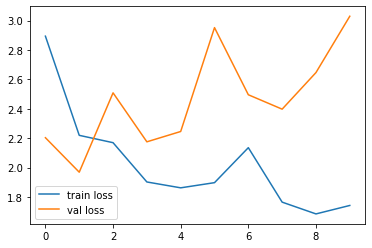

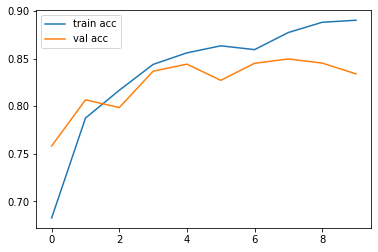

<Figure size 432x288 with 0 Axes>

In [52]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [54]:

y_pred = model.predict(test_set)


144/144 [==============================] - 13s 84ms/step


In [55]:
y_pred

array([[2.5254873e-29, 0.0000000e+00, 9.9999988e-01, ..., 0.0000000e+00,
        1.1850769e-37, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.2625228e-37, 0.0000000e+00],
       [1.5762557e-36, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.2870235e-38],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.8068991e-18, 2.2541422e-25, ..., 2.8661141e-27,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [56]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [57]:
y_pred

array([2, 3, 9, ..., 6, 9, 0])

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_inception.h5')

OSError: ignored

In [84]:
img=image.load_img('/content/ds3.jfif',target_size=(224,224))

In [85]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [72]:
x.shape

(224, 224, 3)

In [73]:
x=x/255

In [74]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [75]:
model.predict(img_data)

1/1 [==============================] - 0s 25ms/step


array([[4.1186286e-20, 6.8386660e-05, 9.9318284e-01, 3.0875397e-10,
        6.7426343e-03, 1.5950810e-10, 1.7524621e-06, 1.9115070e-21,
        4.3760383e-06, 2.4882615e-11]], dtype=float32)

In [76]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 26ms/step


In [79]:
# a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__